# Центральная предельная теорема 

## Задание
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Для своего домашнего задания я выбрал распределение Брэдфорда, которое присутствует в scipy.stats 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bradford
from scipy.stats import norm
import scipy.stats as sts

%matplotlib inline

## Гистограмма  с теоретической плотностью распределения

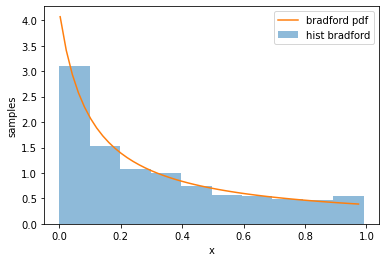

In [2]:
#Задание параметров для распределения
c = 10
#Генерация выборки объема 1000
r = bradford.rvs(c, size=1000)
#Гистограмма для выборки
plt.hist(r, alpha=0.5, density=True, label='hist bradford')

#Теоретическая плотность 
x = np.linspace(bradford.ppf(0.01, c),
                bradford.ppf(0.99, c))
plt.plot(x, bradford.pdf(x, c), label='bradford pdf')
plt.xlabel('x')
plt.ylabel('samples')
plt.legend()
plt.show()

## Основная задача

In [3]:
def Bradford(Mx, Dx, n):
"""
функция для построения гистограммы распределений 
выборочных средних и плотности нормального распределения 
"""
    #генерация выборок объема n
    values = np.array([bradford.rvs(c, size=n) for i in range(1000)])
    #вычисление выборочных средних
    means = values.mean(axis=1)
    #построение гистрограммы
    plt.hist(means, alpha=0.5, density=True, label=f'hist mean n = {n}')

    #вычисление мат.ожиданияи ско для построения плотности нормального распределения
    mu = Mx
    sigma = np.sqrt(Dx/n)
    #зададим нормальное распределение с соответсвующим мат ожиданием и диспресией
    x = np.linspace(0, 1, 100)
    pdf = sts.norm(loc=mu, scale=sigma).pdf(x)
    #построение плотности нормального распределения 
    plt.plot(x, pdf,'g-', label='normal distribution')
    plt.xlabel('x')
    plt.ylabel('samples')
    plt.legend()
    plt.show()

In [4]:
#Вычисление теоретического математического ожидания и дисперсии
MX = bradford.mean(c)
STD = bradford.std(c)
DX = STD**2

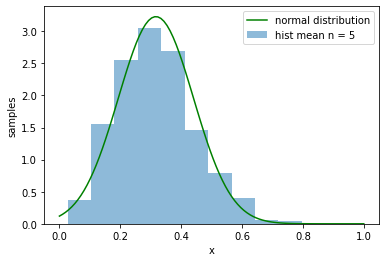

In [5]:
Bradford(MX, DX, 5)

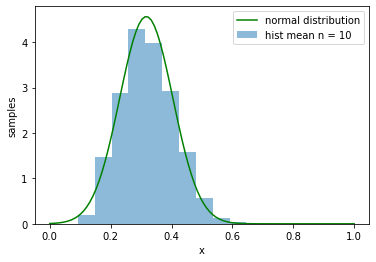

In [6]:
Bradford(MX, DX, 10)

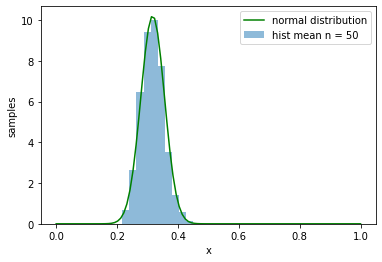

In [7]:
Bradford(MX, DX, 50)

## Вывод
Распределение выборочных средних для функции Брэдфорда хорошо описывается нормальным распределением. С ростом n точность аппроксимации увеличивается.
